### Representacao dos Estados do Brasil em grafos

In [8]:
import pandas as pd
import numpy as np

data = pd.read_csv("Estados_.csv", index_col=0, encoding = "ISO-8859-1")
data

,AC,AL,AP,AM,BA,CE,ES,GO,MA,MT,...,RJ,RN,RS,RO,RR,SC,SP,SE,TO,DF
Estados,,,,,,,,,,,,,,,,,,,,,
AC,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AL,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
AP,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AM,1,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0
BA,0,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
CE,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
ES,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
GO,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
MA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### Lista e Quantidade de vizinhos

In [9]:
estados = {}
for i in data:
    vizinhos = []
    for j in range(len(data[i])):
        if data[i][j] == 1:
            vizinhos.append(data.index[j])
            
    print("Estado: {}com {} estados vizinhos, que sao: {} \n".format(i,len(vizinhos),vizinhos))
    estados[i] = vizinhos
print(estados)

Estado: AC com 1 estados vizinhos, que sao: ['AM '] 

Estado: AL com 3 estados vizinhos, que sao: ['BA ', 'PE ', 'SE '] 

Estado: AP com 1 estados vizinhos, que sao: ['PA '] 

Estado: AM com 5 estados vizinhos, que sao: ['AC ', 'MT ', 'PA ', 'RO ', 'RR '] 

Estado: BA com 8 estados vizinhos, que sao: ['AL ', 'ES ', 'GO ', 'MG ', 'PE ', 'PI ', 'SP ', 'TO '] 

Estado: CE com 4 estados vizinhos, que sao: ['PB ', 'PE ', 'PI ', 'RN '] 

Estado: ES com 3 estados vizinhos, que sao: ['BA ', 'MG ', 'RJ '] 

Estado: GO com 6 estados vizinhos, que sao: ['BA ', 'MT ', 'MS ', 'MG ', 'TO ', 'DF '] 

Estado: MA com 3 estados vizinhos, que sao: ['PA ', 'PI ', 'TO '] 

Estado: MT com 6 estados vizinhos, que sao: ['AM ', 'GO ', 'MS ', 'PA ', 'RO ', 'TO '] 

Estado: MS com 4 estados vizinhos, que sao: ['GO ', 'MT ', 'PR ', 'SP '] 

Estado: MG com 7 estados vizinhos, que sao: ['BA ', 'ES ', 'GO ', 'MT ', 'RJ ', 'SP ', 'DF '] 

Estado: PA com 5 estados vizinhos, que sao: ['AP ', 'AM ', 'MA ', 'RR ', 'TO ']

### Maior e menor grafo:

In [10]:
max_ = []
min_ = []

for i in estados:
    if len(min_) == 0:
        max_.append([i,len(estados[i])])
        min_.append([i,len(estados[i])])
    elif len(estados[i]) <= min_[0][1]:
        if len(estados[i]) == min_[0][1]:
            min_.append([i,len(estados[i])])
        else:
            min_ = [[i,len(estados[i])]]
    elif len(estados[i]) >= max_[0][1]:
        if len(estados[i]) == max_[0][1]:
            max_.append([i,len(estados[i])])
        else:
            max_ = [[i,len(estados[i])]]

print("O estado com mais vizinhos é:{} e o com menor é: {}".format(max_,min_))

O estado com mais vizinhos é:[['BA ', 8]] e o com menor é: [['AC ', 1], ['AP ', 1], ['RS ', 1]]


### O grafo é pouco denso:

In [11]:
max_[0][1]/len(estados)

0.2962962962962963

### Grafico de quantidade/frequencia

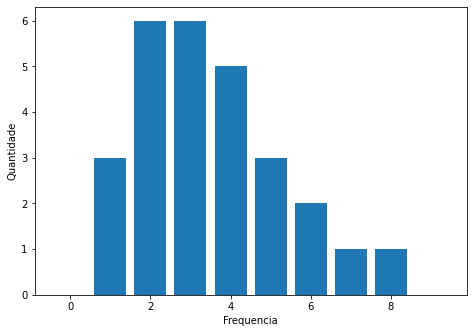

In [12]:
import matplotlib.pyplot as plt

quantidade = np.array([i for i in range((max_[0][1] + 2))])
frequancia = [0] * (max_[0][1] + 2)

for i in estados:
    frequancia[len(estados[i])] += 1


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(quantidade,frequancia)
plt.xlabel("Frequencia")
plt.ylabel("Quantidade")
plt.show()

In [13]:
import networkx as nx
G = nx.Graph()

# adicionando vertices

for i in estados:

    # Adicionando um novo vertice
    G.add_node(i)
    for j in estados[i]:
        #Adicionando suas arestas
        G.add_edge(i, j)


# total de vertices e arestas
n_vertices = G.number_of_nodes()
n_arestas = G.number_of_edges()

print('vertices: ', n_vertices, '\narestas: ', n_arestas)

vertices:  27 
arestas:  50


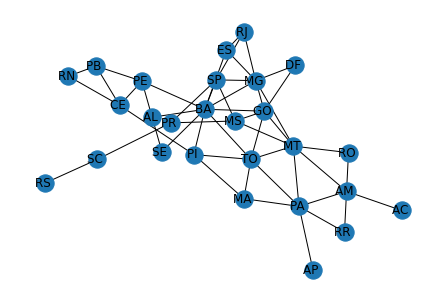

In [14]:
#plot do grafico (aumentando a distancia entre cada node)
nx.spring_layout(G, k=0.15)
nx.draw(G, with_labels=True)